# 根據智慧型手機搜尋到的七個室內Wifi強度來預估該手機位於哪一個房間

In [82]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

In [83]:
columnNames = ['Wifi_1', 'Wifi_2', 'Wifi_3', 'Wifi_4', 'Wifi_5', 'Wifi_6', 'Wifi_7', 'Class']

In [84]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt",
                 names=columnNames, 
                 header=None, 
                 sep='\t')

In [85]:
df.head()

,Wifi_1,Wifi_2,Wifi_3,Wifi_4,Wifi_5,Wifi_6,Wifi_7,Class
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


## 檢查是否有遺漏的資料

In [86]:
df.isnull().any()

Wifi_1    False
Wifi_2    False
Wifi_3    False
Wifi_4    False
Wifi_5    False
Wifi_6    False
Wifi_7    False
Class     False
dtype: bool

## 分別取出x和y資料

In [87]:
x = df.iloc[:,:7]
y = df.Class

## 將DataFrame型態轉為array

In [88]:
x = x.values
y = y.values

In [89]:
x

array([[-64, -56, -61, ..., -71, -82, -81],
       [-68, -57, -61, ..., -71, -85, -85],
       [-63, -60, -60, ..., -76, -85, -84],
       ...,
       [-62, -59, -46, ..., -45, -87, -88],
       [-62, -58, -52, ..., -41, -90, -85],
       [-59, -50, -45, ..., -45, -88, -87]], dtype=int64)

In [90]:
y

array([1, 1, 1, ..., 4, 4, 4], dtype=int64)

## 80%資料做training，20%資料做testing

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 329)

## 線性迴歸函數產生器

In [92]:
regr = LinearRegression()

In [93]:
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## 預測testing data的值並計算準確率(未進行分類後的準確率約為76.93%)

In [94]:
y_pred = regr.predict(x_test)

In [95]:
y_pred

array([2.68484463, 3.01964339, 2.3398604 , 2.62888687, 4.11369601,
       4.24880064, 3.3005692 , 1.57221957, 1.89278205, 1.66150824,
       1.67612818, 2.52987305, 1.82779948, 4.0617509 , 2.88029152,
       2.4508814 , 2.26510909, 3.04005837, 0.44290875, 1.04249654,
       2.24714574, 1.48205959, 3.31391   , 1.73862424, 4.46437798,
       4.45888284, 4.84691203, 2.88528007, 1.60742086, 3.98960058,
       0.49953975, 2.58742304, 3.38130724, 1.26585417, 3.66903461,
       3.69011452, 3.69361629, 1.86026017, 1.05865672, 2.6410062 ,
       2.38755977, 1.56988673, 2.41955642, 2.8168419 , 2.84061316,
       1.89064137, 1.96489743, 1.74635539, 4.22872672, 3.00073438,
       2.33725515, 1.61103449, 0.99514431, 2.56752848, 1.94468337,
       1.86103856, 1.87693967, 4.36949461, 3.06602444, 1.9110113 ,
       2.32544846, 2.45326875, 1.84246425, 1.55152283, 2.49142981,
       1.68370354, 2.29185171, 3.47322889, 4.43904642, 1.22290757,
       2.45187979, 4.0193957 , 2.04233719, 3.72279348, 2.56153

In [96]:
y_test

array([3, 3, 2, 3, 4, 4, 4, 1, 1, 2, 1, 3, 1, 4, 2, 3, 2, 3, 2, 1, 3, 1,
       4, 1, 4, 4, 4, 3, 1, 4, 1, 3, 3, 2, 4, 4, 4, 2, 2, 3, 3, 1, 3, 2,
       2, 2, 1, 1, 4, 3, 2, 1, 2, 4, 2, 2, 2, 4, 3, 1, 3, 3, 3, 2, 3, 1,
       2, 4, 4, 2, 3, 4, 2, 4, 3, 2, 2, 1, 1, 1, 1, 2, 3, 1, 3, 2, 3, 2,
       2, 1, 1, 1, 4, 2, 1, 1, 1, 4, 1, 4, 1, 4, 2, 2, 3, 4, 4, 1, 4, 1,
       4, 3, 3, 2, 3, 3, 4, 1, 3, 1, 1, 2, 1, 3, 2, 4, 1, 2, 2, 1, 4, 4,
       4, 3, 3, 2, 1, 3, 3, 4, 2, 2, 3, 3, 4, 3, 2, 2, 4, 1, 1, 1, 2, 3,
       3, 1, 2, 2, 1, 2, 4, 3, 2, 2, 2, 4, 2, 1, 1, 2, 4, 4, 2, 4, 3, 1,
       2, 3, 3, 1, 1, 3, 1, 2, 1, 4, 3, 3, 4, 4, 1, 3, 2, 1, 1, 3, 2, 1,
       3, 1, 3, 4, 2, 4, 3, 1, 3, 4, 4, 4, 1, 1, 4, 4, 1, 2, 4, 3, 1, 3,
       2, 1, 3, 4, 4, 3, 1, 2, 3, 2, 1, 2, 1, 1, 2, 4, 4, 2, 1, 3, 2, 4,
       3, 3, 2, 1, 3, 4, 3, 4, 4, 2, 4, 2, 1, 3, 3, 4, 4, 4, 4, 2, 4, 3,
       1, 2, 1, 4, 4, 1, 1, 2, 4, 4, 3, 4, 1, 2, 1, 1, 4, 3, 1, 4, 1, 4,
       1, 2, 1, 4, 3, 4, 1, 4, 1, 1, 1, 1, 3, 4, 3,

In [97]:
regr.score(x_test,y_test)

0.7692733999757552

## 由於迴歸函數做出的預測值並非整數，因此額外寫分類函數，根據預測值和{1,2,3,4}哪個整數最接近便將它進行分類

In [98]:
isRounddown = np.ceil(y_pred)-y_pred > y_pred-np.floor(y_pred)
def classification(y_pred):
    y_classification = np.zeros(len(y_pred))
    for i in range(0,len(y_pred)):
        if y_pred[i] < 1:
            y_classification[i] = 1
        elif y_pred[i] > 4:
            y_classification[i] = 4
        else:
            #y_classification[i] = np.round(y_pred[i])
            if isRounddown[i]:
                y_classification[i] = np.floor(y_pred[i])
            else:
                y_classification[i] = np.ceil(y_pred[i])
    return y_classification

In [99]:
y_classification = classification(y_pred)

## 畫出正確分類的散佈圖(藍色)和預測分類的散佈圖(橘色)，不重疊之處表示分類錯誤

In [100]:
X = np.linspace(1,len(x_test)+1,len(x_test))

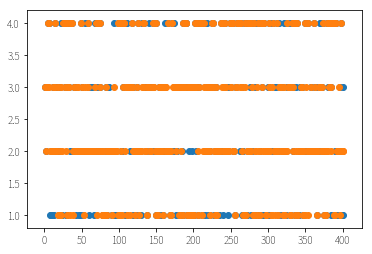

In [101]:
plt.scatter(X,y_test)
plt.scatter(X, y_classification)

## 由於圖形較難判讀，因此額外統整分類情況表格，並計算預測結果正確率

In [102]:
result = np.zeros((4,4))

In [103]:
result[0,0] = y_classification[(y_classification - y_test == 0) & (y_classification == 1)].sum()
result[1,1] = y_classification[(y_classification - y_test == 0) & (y_classification == 2)].sum()/2
result[2,2] = y_classification[(y_classification - y_test == 0) & (y_classification == 3)].sum()/3
result[3,3] = y_classification[(y_classification - y_test == 0) & (y_classification == 4)].sum()/4

In [104]:
result[0,1] = y_classification[(y_classification - y_test == 1) & (y_classification == 2)].sum()/2
result[1,2] = y_classification[(y_classification - y_test == 1) & (y_classification == 3)].sum()/3
result[2,3] = y_classification[(y_classification - y_test == 1) & (y_classification == 4)].sum()/4
result[1,0] = y_classification[(y_classification - y_test == -1) & (y_classification == 1)].sum()
result[2,1] = y_classification[(y_classification - y_test == -1) & (y_classification == 2)].sum()/2
result[3,2] = y_classification[(y_classification - y_test == -1) & (y_classification == 3)].sum()/3

In [105]:
result

array([[52., 53.,  0.,  0.],
       [17., 61., 19.,  0.],
       [ 0., 33., 63.,  0.],
       [ 0.,  0., 23., 79.]])

In [106]:
resultDF = pd.DataFrame(result, columns=['1號房間','2號房間','3號房間','4號房間'])

In [107]:
resultDF.index = range(1,5)

## 分類情況表格:
### 補充:有17支智慧型手機實際在編號2房間，但預測結果卻分類到1號房間，以此類推。

In [108]:
resultDF

,1號房間,2號房間,3號房間,4號房間
1,52.0,53.0,0.0,0.0
2,17.0,61.0,19.0,0.0
3,0.0,33.0,63.0,0.0
4,0.0,0.0,23.0,79.0


In [109]:
resultDF['總和'] = resultDF.sum(axis=1)

In [110]:
resultDF

,1號房間,2號房間,3號房間,4號房間,總和
1,52.0,53.0,0.0,0.0,105.0
2,17.0,61.0,19.0,0.0,97.0
3,0.0,33.0,63.0,0.0,96.0
4,0.0,0.0,23.0,79.0,102.0


In [111]:
num_classification = [resultDF['1號房間'].sum(axis=0), resultDF['2號房間'].sum(axis=0),resultDF['3號房間'].sum(axis=0), resultDF['4號房間'].sum(axis=0)]

Text(0,0.5,'智慧型手機數量')

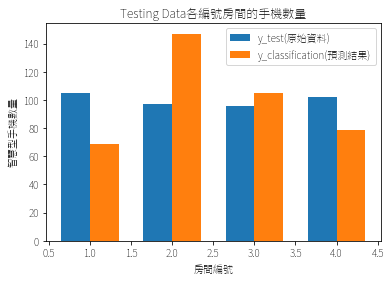

In [112]:
plt.bar(resultDF.index, resultDF['總和'], label = 'y_test(原始資料)', align = 'edge', width = -0.35)
plt.bar(resultDF.index, num_classification, label = 'y_classification(預測結果)', align = 'edge', width = 0.35)
plt.legend()
plt.title("Testing Data各編號房間的手機數量")
plt.xlabel("房間編號")
plt.ylabel("智慧型手機數量")

## 預測結果正確率約為63.75%

In [113]:
(len(y_classification) - abs(y_classification - y_test).sum()) / len(y_classification) * 100

63.74999999999999

# 參考別人作業的的類神經

In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers, initializers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=0)
model = Sequential()
n_cols = x_train.shape[1]
#add model layers
model.add(Dense(50, activation='relu', input_shape=(n_cols,),kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(50, activation='relu',kernel_initializer="he_normal"))
model.add(Dense(1))

#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')
#train model
model.fit(x_train,y_train, epochs=1000,callbacks=[early_stopping],batch_size=64)

Epoch 1/1000
1600/1600 [==============================] - 1s 413us/step - loss: 28.4876
Epoch 2/1000
1600/1600 [==============================] - 0s 29us/step - loss: 1.7517
Epoch 3/1000
1600/1600 [==============================] - 0s 30us/step - loss: 0.4249
Epoch 4/1000
1600/1600 [==============================] - 0s 33us/step - loss: 0.2948
Epoch 5/1000
1600/1600 [==============================] - 0s 29us/step - loss: 0.2391
Epoch 6/1000
1600/1600 [==============================] - 0s 32us/step - loss: 0.2122
Epoch 7/1000
1600/1600 [==============================] - 0s 32us/step - loss: 0.2032
Epoch 8/1000
1600/1600 [==============================] - 0s 32us/step - loss: 0.1758
Epoch 9/1000
1600/1600 [==============================] - 0s 33us/step - loss: 0.1638
Epoch 10/1000
1600/1600 [==============================] - 0s 31us/step - loss: 0.1560
Epoch 11/1000
1600/1600 [==============================] - 0s 29us/step - loss: 0.1450
Epoch 12/1000
1600/1600 [=========================

In [115]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

MSE train: 0.10, test: 0.11
R^2 train: 0.92, test: 0.91


# statsmodels(也是線性回歸)

In [116]:
result = sm.OLS(y_train,x_train).fit()

In [117]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     4959.
Date:                Fri, 12 Apr 2019   Prob (F-statistic):               0.00
Time:                        12:22:30   Log-Likelihood:                -1381.8
No. Observations:                1600   AIC:                             2778.
Df Residuals:                    1593   BIC:                             2815.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0224      0.003      6.625      0.0

# 監督式學習的機器學習SVM(一種分類器)

In [75]:
clf = SVC()

In [76]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
y_predict = clf.predict(x_test)

In [78]:
accuracy_score(y_test,y_predict)

0.7875

In [79]:
confusion_matrix(y_test,y_predict)

array([[84, 21,  0,  0],
       [ 0, 97,  0,  0],
       [ 0, 34, 62,  0],
       [ 0, 30,  0, 72]], dtype=int64)